# Quantile Normalization

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
genes=np.load("genes_tpm_v11_clean_noutliers.npy",allow_pickle=True)
samples=np.load("samples_tpm_v11_clean_noutliers.npy",allow_pickle=True)
X=np.load("results_tpm_v11_clean_noutliers.npy",allow_pickle=True)
results=pd.DataFrame(X,index=genes,columns=samples)

In [3]:
results.head()

,GSM741172,GSM741170,GSM741171,GSM907015,GSM1193921,GSM1098188,GSM1193928,GSM1048186,GSM1216828,GSM1241249,...,GSM5572862,GSM5577332,GSM5577333,GSM5577334,GSM5577335,GSM5577336,GSM5577337,GSM5580099,GSM5580100,GSM5580102
A1BG,1.514984,1.316501,0.945544,12.863701,71.141045,0.738105,134.292114,10.272301,2.855723,0.000000,...,0.778685,6.074946,6.227352,5.103860,8.809099,7.493229,7.746690,42.761230,35.295048,35.235378
A1CF,0.208822,0.199274,0.138544,0.058604,0.301775,0.034464,1.374310,0.267306,13.903001,0.000000,...,0.163493,0.129097,0.266828,0.162259,0.165147,0.261044,0.246418,0.013703,0.031029,0.020903
A2M,61.154045,141.594360,62.881958,109.156868,0.000000,313.137146,0.000000,216.393066,22.510412,0.000000,...,0.000000,0.130720,0.426572,0.000000,0.507422,0.200596,0.000000,314.406342,426.812805,311.372803
A2ML1,0.373835,0.262869,0.266668,0.799892,0.655797,0.109945,0.366945,4.065595,0.190527,1.748747,...,0.112173,1.403640,2.326312,2.850472,3.334096,3.415315,2.629406,0.064991,0.255675,0.041696
A3GALT2,0.722773,1.094620,0.645631,0.000000,0.000000,0.458957,0.000000,4.969500,0.000000,0.000000,...,0.000000,0.457722,0.104935,0.179656,0.000000,0.313955,0.304647,0.000000,0.000000,0.151392


In [9]:
results.shape

(20842, 62571)

In [10]:
secretome=pd.read_csv("secretome_included_V11.csv",header=None,names=["gene"])

In [11]:
secretome.head()

,gene
0,SERPINB5
1,IGHV6-1
2,CGB3
3,WNT7A
4,DEFB126


In [12]:
secretome.shape

(1890, 1)

In [13]:
for gene in secretome.gene:
    if gene not in results.index:
        print(gene)

In [14]:
results.drop(secretome.gene, axis=0,inplace=True)

In [15]:
results.head()

,GSM741172,GSM741170,GSM741171,GSM907015,GSM1193921,GSM1098188,GSM1193928,GSM1048186,GSM1216828,GSM1241249,...,GSM5572862,GSM5577332,GSM5577333,GSM5577334,GSM5577335,GSM5577336,GSM5577337,GSM5580099,GSM5580100,GSM5580102
A1CF,0.208822,0.199274,0.138544,0.058604,0.301775,0.034464,1.374310,0.267306,13.903001,0.000000,...,0.163493,0.129097,0.266828,0.162259,0.165147,0.261044,0.246418,0.013703,0.031029,0.020903
A3GALT2,0.722773,1.094620,0.645631,0.000000,0.000000,0.458957,0.000000,4.969500,0.000000,0.000000,...,0.000000,0.457722,0.104935,0.179656,0.000000,0.313955,0.304647,0.000000,0.000000,0.151392
A4GALT,36.032150,37.229839,33.279217,1.015697,142.980347,36.433231,183.780090,10.563320,2.462949,0.701296,...,18.059050,5.627535,7.101623,7.093668,7.457928,5.663228,7.826350,0.033709,0.000000,0.000000
A4GNT,0.030812,0.000000,0.000000,1.430780,0.492563,0.048803,0.495588,0.000000,0.030563,0.000000,...,0.000000,0.080976,0.055640,0.047948,0.247546,0.278913,0.000000,0.389952,0.440706,0.318720
AAAS,53.506466,53.790775,47.527954,25.903215,273.925598,45.429768,232.081818,51.678558,29.881355,19.422600,...,42.163074,101.262016,90.680084,89.193260,108.643570,118.603142,114.563354,43.215916,49.570923,31.762648


In [16]:
results.shape

(18952, 62571)

### Looking at the distribution

In [17]:
counts=np.asarray(results,dtype=int)

In [18]:
counts.shape

(18952, 62571)

Picking 50 random samples to plot distributions

In [19]:
#subset data for plotting
np.random.seed(seed=1)

#select 50 samples
samples_index=np.random.choice(range(counts.shape[1]),size=50,replace=False)
counts_subset=counts[:,samples_index]

In [20]:
#plotting format function
def reduce_xaxis_labels(ax,factor):
    plt.setp(ax.xaxis.get_ticklabels(),visible=False)
    for label in ax.xaxis.get_ticklabels()[factor-1::factor]:
        label.set_visible(True)

CPU times: user 376 ms, sys: 18.6 ms, total: 394 ms
Wall time: 660 ms


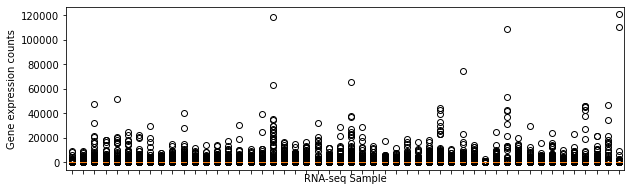

In [21]:
%%time
fig, ax = plt.subplots(figsize=(10, 3))

ax.boxplot(counts_subset)
ax.set_xlabel("RNA-seq Sample")
ax.set_ylabel("Gene expression counts")
reduce_xaxis_labels(ax, 5)

CPU times: user 394 ms, sys: 11.9 ms, total: 406 ms
Wall time: 404 ms


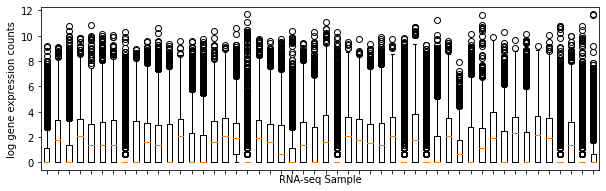

In [22]:
%%time
fig,ax=plt.subplots(figsize=(10,3))

ax.boxplot(np.log(counts_subset+1))
ax.set_xlabel("RNA-seq Sample")
ax.set_ylabel("log gene expression counts")
reduce_xaxis_labels(ax,5)

### Quantile normalization

In [23]:
def quantile_norm(X):
    """Normalize the columns of dataframe X to make each have the same distribution"""
    #compute quatiles
    quantiles=np.mean(np.sort(X,axis=0),axis=1)
    #compute column-wise ranks and each observation is replaced with its rank in that column
    ranks=np.apply_along_axis(stats.rankdata,0,X)
    #convert ranks to indices from 0 to M-1
    rank_indices=ranks.astype(int)-1
    #index the quantiles for each rank with the ranks matrix
    Xn=quantiles[rank_indices]
    return (Xn)

In [24]:
#def quantile_norm_log(X):
 #   logX=np.log(X+1)
  #  logXn=quantile_norm(logX)
   # return logXn

In [25]:
%time
counts_qnorm=quantile_norm(counts)

CPU times: user 1 µs, sys: 5 µs, total: 6 µs
Wall time: 10.5 µs


In [26]:
def plot_col_density(data):
    #for each column produce density plot over all rows
    #use gaussian smoothing to estimate the density
    density_per_col=[stats.gaussian_kde(col) for col in data.T]
    x=np.linspace(np.min(data),np.max(data),100)
    
    fig,ax=plt.subplots()
    for density in density_per_col:
        ax.plot(x,density(x))
    ax.set_xlabel("log counts (per RNA-seq sample)")
    ax.set_ylabel("Density")

CPU times: user 7.52 s, sys: 473 ms, total: 8 s
Wall time: 842 ms


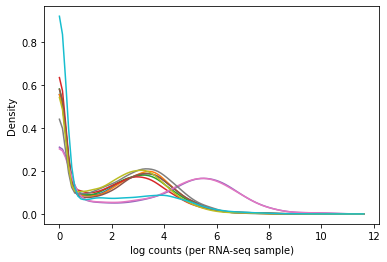

In [27]:
%%time
#before normalization
log_counts=np.log(counts[:,:10]+1)
plot_col_density(log_counts)

CPU times: user 5.4 s, sys: 326 ms, total: 5.73 s
Wall time: 579 ms


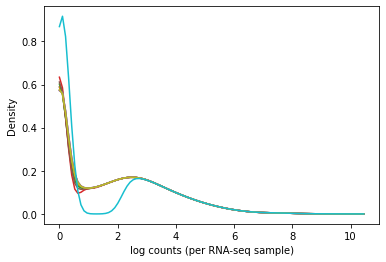

In [28]:
%%time
#after normalization
log_counts=np.log(counts_qnorm[:,:10]+1)
plot_col_density(log_counts[:,:10])

In [29]:
counts_qnorm.shape

(18952, 62571)

In [30]:
qnorm_df=pd.DataFrame(counts_qnorm, index=results.index, columns=results.columns, dtype=int)

In [31]:
qnorm_df.head()

,GSM741172,GSM741170,GSM741171,GSM907015,GSM1193921,GSM1098188,GSM1193928,GSM1048186,GSM1216828,GSM1241249,...,GSM5572862,GSM5577332,GSM5577333,GSM5577334,GSM5577335,GSM5577336,GSM5577337,GSM5580099,GSM5580100,GSM5580102
A1CF,0,0,0,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A4GALT,23,23,23,1,8,22,11,3,0,0,...,19,1,2,2,2,1,2,0,0,0
A4GNT,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAS,39,38,37,21,17,30,15,29,22,24,...,44,74,63,61,88,96,93,34,40,25


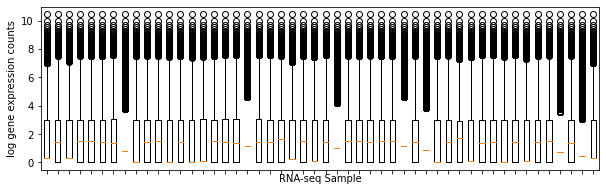

In [32]:
#select 50 samples
counts_subset_qnorm=counts_qnorm[:,samples_index]

fig,ax=plt.subplots(figsize=(10,3))

ax.boxplot(np.log(counts_subset_qnorm+1))
ax.set_xlabel("RNA-seq Sample")
ax.set_ylabel("log gene expression counts")
reduce_xaxis_labels(ax,5)

In [19]:
#qnorm_df.to_csv("results_clean_qnorm_v10.csv")

In [33]:
np.save("genes_qnorm_v11_clean_noutliers_nosecret.npy",qnorm_df.index.values)
np.save("samples_qnorm_v11_clean_noutliers_nosecret.npy",qnorm_df.columns.values)
np.save("results_qnorm_v11_clean_noutliers_nosecret.npy", qnorm_df.values)

## Calculating Secretory Index for each sample

Making a new dataframe to hold the secretory sums of all samples

In [21]:
secretome_included=(pd.read_csv("secretome_included_V10.csv",header=None))[0].tolist()

In [22]:
secretome_included[0:10]

['IGKV1-13',
 'FGF16',
 'IGHV3-23',
 'LAMB3',
 'DEFB103B',
 'IGHV1-18',
 'DEFB128',
 'SPOCK3',
 'IAPP',
 'CILP']

In [23]:
secreted_sum=pd.DataFrame(index=qnorm_df.columns,data=qnorm_df.loc[secretome_included,:].sum(axis=0),columns=["secreted"])

In [24]:
secreted_sum.head()

,secreted
GSM741172,78212
GSM741170,75657
GSM741171,79408
GSM907015,217949
GSM1193921,39684


In [25]:
secreted_sum.to_csv("secretome_sum_V10_qnorm.csv")

In [26]:
total_depth=results.sum(axis=0)

In [27]:
total_depth

GSM741172     9.581772e+05
GSM741170     9.565647e+05
GSM741171     9.554932e+05
GSM907015     9.581006e+05
GSM1193921    8.621464e+06
                  ...     
GSM4780603    9.515668e+05
GSM4780605    9.516551e+05
GSM4780607    9.516910e+05
GSM4780609    9.515454e+05
GSM4780610    9.523717e+05
Length: 50723, dtype: float32

In [28]:
si=(secreted_sum.secreted/pd.Series(total_depth))*1000000

In [29]:
si.head()

GSM741172      81625.820312
GSM741170      79092.406250
GSM741171      83106.812500
GSM907015     227480.296875
GSM1193921      4602.930664
dtype: float32

In [30]:
si.astype(int).to_csv("si_V10_qnorm.csv")